In [119]:
import seaborn as sns
import numpy as np
import pandas as pd
from string import punctuation
from collections import Counter
import matplotlib.pyplot as plt

sns.set(rc = {'figure.figsize':(15, 7)})
sns.set_style('white')
pd.set_option('display.max_columns', 500)
title_fontsize = 15

In [41]:
tweets = pd.read_csv('./data/stock_tweets.csv', parse_dates=['Date'])
stocks = pd.read_csv('./data/stock_yfinance_data.csv')

tweets.head()

,Date,Tweet,Stock Name,Company Name
0,2022-09-29 23:41:16+00:00,Mainstream media has done an amazing job at br...,TSLA,"Tesla, Inc."
1,2022-09-29 23:24:43+00:00,Tesla delivery estimates are at around 364k fr...,TSLA,"Tesla, Inc."
2,2022-09-29 23:18:08+00:00,3/ Even if I include 63.0M unvested RSUs as of...,TSLA,"Tesla, Inc."
3,2022-09-29 22:40:07+00:00,@RealDanODowd @WholeMarsBlog @Tesla Hahaha why...,TSLA,"Tesla, Inc."
4,2022-09-29 22:27:05+00:00,"@RealDanODowd @Tesla Stop trying to kill kids,...",TSLA,"Tesla, Inc."


In [42]:
stocks.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Stock Name
0,2021-09-30,260.333344,263.043335,258.333344,258.493347,258.493347,53868000,TSLA
1,2021-10-01,259.466675,260.260010,254.529999,258.406677,258.406677,51094200,TSLA
2,2021-10-04,265.500000,268.989990,258.706665,260.510010,260.510010,91449900,TSLA
3,2021-10-05,261.600006,265.769989,258.066681,260.196655,260.196655,55297800,TSLA
4,2021-10-06,258.733337,262.220001,257.739990,260.916656,260.916656,43898400,TSLA


### Cleaning up the Tweets

In [58]:
# making everything lowercase
tweets['Tweet'] = tweets['Tweet'].apply(lambda x: x.lower())

# removing punctuation
tweets['Tweet'] = tweets['Tweet'].apply(lambda x: ''.join([c for c in x if c not in punctuation]))

tweets.head()

,Date,Tweet,Stock Name,Company Name
0,2022-09-29 23:41:16+00:00,mainstream media has done an amazing job at br...,TSLA,"Tesla, Inc."
1,2022-09-29 23:24:43+00:00,tesla delivery estimates are at around 364k fr...,TSLA,"Tesla, Inc."
2,2022-09-29 23:18:08+00:00,3 even if i include 630m unvested rsus as of 6...,TSLA,"Tesla, Inc."
3,2022-09-29 22:40:07+00:00,realdanodowd wholemarsblog tesla hahaha why ar...,TSLA,"Tesla, Inc."
4,2022-09-29 22:27:05+00:00,realdanodowd tesla stop trying to kill kids yo...,TSLA,"Tesla, Inc."


### Tokenization

In [80]:
# create a list of all tweets in column
all_tweets = tweets['Tweet'].tolist()

# join the tweets together to make one big blob
text = ' '.join(all_tweets)

# finding the most frequent words
words = text.split()
word_counts = Counter(words)

# sort the words so the most frequent are on top
total_words = len(words)
sorted_words = word_counts.most_common(total_words)

In [ ]:
# create an int-mapping dictionary so most common words will have lower indexes
vocab_to_int = {w:i+1 for i, (w, c) in enumerate(sorted_words)}



In [82]:
len(all_tweets)

80793

In [125]:
# tokenize the words so they are defined by integers rather than strings
tweets_int = []
for word in all_tweets:
    r = [vocab_to_int[w] for w in word.split()]
    tweets_int.append(r)
print(tweets_int[0:3])

[[4636, 472, 40, 386, 67, 422, 955, 18, 31186, 129, 44, 18, 153, 32, 150, 1196, 58, 217, 32, 389, 6, 41, 12, 244, 10, 241, 55, 162, 1, 2635, 227, 41, 233, 23811, 20, 77, 241, 55, 41217, 1456, 13, 1218, 41, 1, 1491, 234, 2768, 2, 41218], [10, 424, 1227, 23, 18, 296, 19935, 27, 1, 772, 3], [70, 176, 26, 12, 1873, 31187, 23812, 13895, 28, 7, 7265, 1885, 995, 1190, 9, 1, 13895, 8, 31187, 384, 4987, 8030, 26, 1, 367, 436, 156, 18, 4987, 81, 98, 226, 4549, 9, 2769, 93, 1129, 8030, 9, 13895, 54, 11034, 69, 995, 141, 3]]


In [157]:
from matplotlib.lines import Line2D

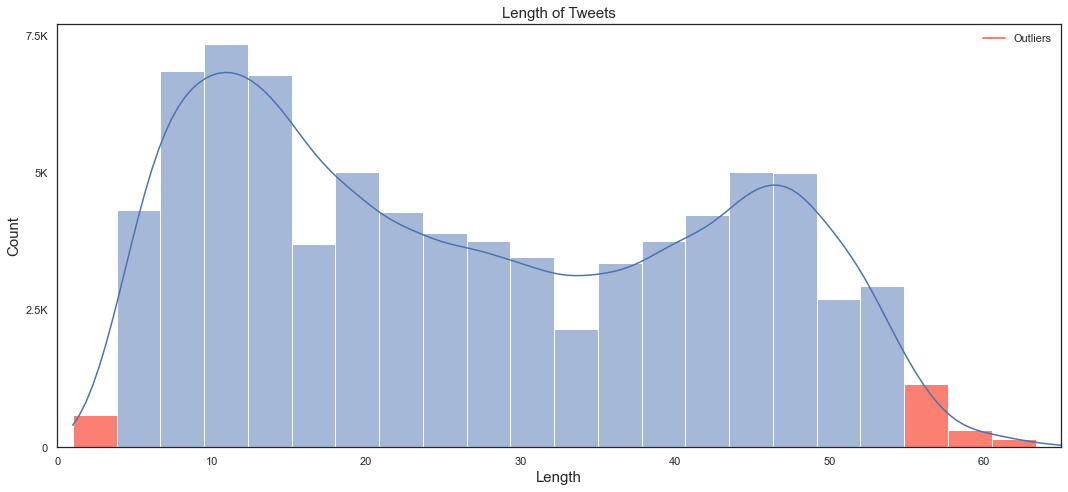

count    80793.000000
mean        27.027020
std         15.538215
min          1.000000
25%         13.000000
50%         25.000000
75%         41.000000
max         86.000000
dtype: float64

In [174]:
tweets_len = [len(x) for x in tweets_int]

fig = sns.histplot(pd.Series(tweets_len), bins=30, kde=True)
fig.set(xlim=(0, 65), yticks=[0, 2.5e3, 5e3, 7.5e3], 
        yticklabels=[0, '2.5K', '5K', '7.5K'])



plt.xlabel('Length', fontsize=title_fontsize)
plt.ylabel('Count', fontsize=title_fontsize)
plt.title('Length of Tweets', fontsize = title_fontsize)

# coloring outliers red
fig.patches[0].set_facecolor('salmon')
fig.patches[19].set_facecolor('salmon')
fig.patches[20].set_facecolor('salmon')
fig.patches[21].set_facecolor('salmon')

# creating legend for outliers
outliers = [Line2D([0], [0], color='salmon', lw=2)]
plt.legend(outliers, ['Outliers'], frameon=False)

plt.tight_layout()
plt.savefig('./visualization/Preprocessing: Tweet_Lengths.png', dpi = 600)
plt.show()

pd.Series(tweets_len).describe()

In [208]:
# removing outliers
tweets_df = pd.DataFrame(tweets_len)
df = tweets_df[(tweets_df[0] > 3) & (tweets_df[0] < 55)]
tweets = tweets.loc[df.index]
tweets.head()

,Date,Tweet,Stock Name,Company Name
0,2022-09-29 23:41:16+00:00,mainstream media has done an amazing job at br...,TSLA,"Tesla, Inc."
1,2022-09-29 23:24:43+00:00,tesla delivery estimates are at around 364k fr...,TSLA,"Tesla, Inc."
2,2022-09-29 23:18:08+00:00,3 even if i include 630m unvested rsus as of 6...,TSLA,"Tesla, Inc."
3,2022-09-29 22:40:07+00:00,realdanodowd wholemarsblog tesla hahaha why ar...,TSLA,"Tesla, Inc."
4,2022-09-29 22:27:05+00:00,realdanodowd tesla stop trying to kill kids yo...,TSLA,"Tesla, Inc."


In [212]:
tweets.to_csv('./data/stock_tweets_cleaned.csv')